In [40]:
import pandas as pd
import numpy as np
import re
from numpy.linalg import norm
import seaborn as sns 

In [2]:
doc1 = "As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead."
doc2 = "Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities."
doc3 = "With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth."
doc4 = "The mild spring weather marks the transition from the cold winter to the inviting warmth of summer."
doc5 = "During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."
doc6 = "Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight."
doc7 = "The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring."
doc8 = "As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring."
doc9 = "The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring."
doc10 = "Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."

myspace = [doc1, doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9, doc10]

In [37]:
#creating vocab from documents
vocab = set()
prelim = []
for s in myspace:
    prelim.extend(re.split(r'[ ,.]+', s))
for word in prelim:
    vocab.add(word)
vocab.remove('')
print(vocab)

{'is', 'warmer', 'warm', 'but', 'inviting', 'ahead', 'families', 'only', 'cold', 'of', 'growth', 'warmth', 'continues', 'blooming', 'enjoy', 'outdoors', "season's", 'vacations', 'weather', 'signaling', 'transition', 'extended', 'open', 'arrives', 'As', 'filled', 'unfolds', 'their', 'not', 'full', 'Spring', 'spring', 'flowers', 'life', 'allowing', 'awaited', 'since', 'pleasant', 'in', 'season', 'seasonal', 'more', 'winter', 'spending', 'with', 'adventures', 'peak', 'time', 'even', 'Summer', 'outdoor', 'sunlight', 'the', 'days', 'mild', 'promise', 'pattern', 'a', 'planning', 'blossoms', 'marks', 'grow', 'that', 'enjoying', 'encourages', 'began', 'brings', 'are', 'also', 'swimming', 'continuation', 'planned', 'from', 'often', 'With', 'hours', 'visits', 'invites', 'people', 'into', 'anticipation', 'gardens', 'as', 'longer', 'culminating', 'fun', 'summer', 'The', 'During', 'starts', 'daylight', 'start', 'to', 'and', 'sunny', 'first', 'activities', 'trend', 'for', 'much', 'beach', 'temperatu

In [13]:
#given a vocab and a document, creates it's vector representation
def docvector(vocab, doc):
    vocab = list(vocab)
    docwordcount = np.zeros(len(vocab), dtype=int)
    docwords = []
    docwords.extend(re.split(r'[ ,.]+', doc))  #list of all words in doc
    for word in docwords:
        if word in vocab:
            index = vocab.index(word)
            docwordcount[index] += 1
    return docwordcount

#print(docvector(vocab, doc1))

In [64]:
#store each document name and it's corresponding vector rep in an array
docvectors = {}
num = 1
for doc in myspace:
    docvectors['doc' + str(num)] = docvector(vocab, doc)
    num = num + 1
#print (docvectors)

In [35]:
#function for cosine similarity between two vectors
def cosSimilarity(vec1, vec2):
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine

In [65]:
#makes a table with the cosine similarity between each document in it
names = ['doc1', 'doc2', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8', 'doc9', 'doc10']
data = np.full((len(names), len(names)), np.nan)
df = pd.DataFrame(data, names, names)
#print(df)
for row_name in df.index:
    for col_name in df.columns:
        df.at[row_name, col_name] = cosSimilarity(docvectors[row_name], docvectors[col_name])
#print(df)

           doc1      doc2      doc3      doc4      doc5      doc6      doc7  \
doc1   1.000000  0.255155  0.468293  0.553317  0.348155  0.285774  0.240563   
doc2   0.255155  1.000000  0.172062  0.208514  0.213201  0.300000  0.176777   
doc3   0.468293  0.172062  1.000000  0.526201  0.342381  0.229416  0.216295   
doc4   0.553317  0.208514  0.526201  1.000000  0.400099  0.250217  0.294884   
doc5   0.348155  0.213201  0.342381  0.400099  1.000000  0.298481  0.301511   
doc6   0.285774  0.300000  0.229416  0.250217  0.298481  1.000000  0.235702   
doc7   0.240563  0.176777  0.216295  0.294884  0.301511  0.235702  1.000000   
doc8   0.400892  0.272772  0.400501  0.455016  0.372194  0.174574  0.462910   
doc9   0.187317  0.172062  0.210526  0.334855  0.293470  0.137649  0.270369   
doc10  0.360288  0.147087  0.314945  0.327144  0.292685  0.156893  0.323575   

           doc8      doc9     doc10  
doc1   0.400892  0.187317  0.360288  
doc2   0.272772  0.172062  0.147087  
doc3   0.400501 

In [68]:
#Creating an ordered list from least similar to greatest similar based on cosine similarity
orderedsimilar = {}  #list of vector pairs and their cosine similarity
for row_name in df.index:
    for col_name in df.columns:
        name = col_name + "/" + row_name
        if name not in orderedsimilar:
            orderedsimilar[row_name + "/" + col_name] = df.at[row_name, col_name]
sorted_tuples = sorted(orderedsimilar.items(), key=lambda item: item[1]) #sorts by key?
print(sorted_tuples)

[('doc6/doc9', 0.13764944032233706), ('doc2/doc10', 0.14708710135363803), ('doc6/doc10', 0.15689290811054724), ('doc2/doc3', 0.1720618004029213), ('doc2/doc9', 0.1720618004029213), ('doc6/doc8', 0.1745743121887939), ('doc2/doc7', 0.1767766952966369), ('doc9/doc10', 0.179968508266339), ('doc1/doc9', 0.1873171623163388), ('doc8/doc9', 0.20025046972870353), ('doc2/doc4', 0.20851441405707477), ('doc3/doc9', 0.21052631578947364), ('doc2/doc5', 0.21320071635561041), ('doc3/doc7', 0.21629522817435007), ('doc3/doc6', 0.22941573387056174), ('doc6/doc7', 0.23570226039551587), ('doc1/doc7', 0.2405626121623441), ('doc4/doc6', 0.2502172968684897), ('doc1/doc2', 0.2551551815399144), ('doc7/doc9', 0.2703690352179376), ('doc2/doc8', 0.2727723627949905), ('doc1/doc6', 0.2857738033247041), ('doc5/doc10', 0.29268470350248177), ('doc5/doc9', 0.29346959282671103), ('doc4/doc7', 0.2948839123097943), ('doc5/doc6', 0.29848100289785456), ('doc2/doc6', 0.3), ('doc5/doc7', 0.30151134457776363), ('doc3/doc10', 0.

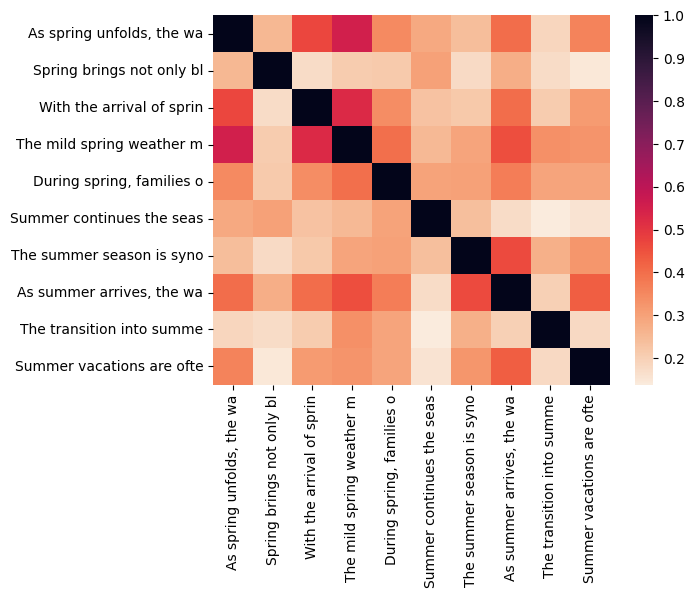

In [69]:
length = 25  #desired length of row labels
matr = df.values   #matrix of all the values
#matr
labels = myspace  #lables are the sentences in each doc
trunclabels = [label[:length] for label in labels]    #make each label only desired length long
fig5 = sns.heatmap(matr, xticklabels = trunclabels , yticklabels = trunclabels, cmap = 'rocket_r')  #heat map